In [ ]:
# PRACTICA DE NLP

In [ ]:
#####################################################################################################################

In [ ]:
## 0 - PRIMEROS PASOS

In [39]:
# Lo primero de todo voy a importar las librerías que voy a necesitar
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata

from stop_words import get_stop_words
from wordcloud import WordCloud

In [4]:
#####################################################################################################################

In [5]:
## 1 - LECTURA DEL DATASETS NECESARIOS PARA LA OBTENCIÓN DE LOS DATOS 

In [6]:
# He optado por el dataset de Tweets por ser mas ligero. Por lo que procedo a crear el dataset
original_dataset = pd.read_csv('dataset_tweets.csv', sep=',', decimal='.')

In [7]:
# Comprobamos si se han cargado bien los datos
original_dataset.head(3)

,Unnamed: 0,date,id,link,retweet,text,author
0,0,Oct 4,783396985093193728,/missyscheng/status/783396985093193728,False,#DataScience Basics: #DataMining vs. #Statisti...,various
1,1,Oct 4,783381842024103936,/EXASOLAG/status/783381842024103936,False,How to Become a #Data Scientist – Part 1: http...,various
2,2,Oct 4,783433625723252736,/TarasNovak/status/783433625723252736,False,@jesterxl @kdnuggets or just go with @tableau :),various


In [8]:
# Viendo que campos tiene este dataset, lo voy a tratar un poco solo para quitar los campos que no veo relevantes
valid_columns = ['date','link','retweet','text','author']
original_dataset = original_dataset[valid_columns]
original_dataset.head(3)

,date,link,retweet,text,author
0,Oct 4,/missyscheng/status/783396985093193728,False,#DataScience Basics: #DataMining vs. #Statisti...,various
1,Oct 4,/EXASOLAG/status/783381842024103936,False,How to Become a #Data Scientist – Part 1: http...,various
2,Oct 4,/TarasNovak/status/783433625723252736,False,@jesterxl @kdnuggets or just go with @tableau :),various


In [9]:
#####################################################################################################################

In [10]:
## 2 - LIMPIEZA DE LOS DATOS DEL DATASET CARGADO

In [11]:
# Primero creo un dataset particular para no ensuciar el original de carga y me quedo solo con el texto de cada fila
full_dataset = original_dataset['text']
print(full_dataset)

0        #DataScience Basics: #DataMining vs. #Statisti...
1        How to Become a #Data Scientist – Part 1: http...
2         @jesterxl @kdnuggets or just go with @tableau :)
3        #Boston U. Online MS in Applied #Business #Ana...
4        #ICYMI Still Searching for ROI in #BigData Ana...
                               ...                        
10435    Fresh from @KDNuggets: Webinar: Driving Data D...
10436    Automated #DataScience - the user points it to...
10437    The Mirage of a Citizen #Data Scientist | @kdn...
10438    The Force Awakens In Data – Industry Leaders C...
10439    This week's #FridayFunny brought to you by @kd...
Name: text, Length: 10440, dtype: object


In [12]:
# Miro a ver cuantos de esos datos son Nulos
full_dataset.isna().sum()

0

In [13]:
# Perfecto, o hay que limpiar campos nulos

In [14]:
#####################################################################################################################

In [15]:
## 3 - ANALISIS EXPLORATORIO

In [16]:
# Voy a hacer un análisis exploratorio del contenido de las palabras que tienen esos tweets 
# y me he decantado por una nube de palabras porque me resulta muy visual.
# Para esto no puedo contar con absolutamente todos los tweets, ya que son mas de 10.000, 
# por consiguiente los voy a hacer con los primeros 3.000 tweets
grupos_de_tweets = []
counter = 0
words_group = ""

# Para los primeros 3000 tweets porque sino van a ser muchos
for word in full_dataset[:3000]:
    # troceo la palabra separada por espacios
    words_splits = word.lower().split()
    
    # Ahora introduzco cada palabra en el array de todas las palabras
    for sub_word in words_splits:
        grupos_de_tweets.append(sub_word)

print(grupos_de_tweets)

['#datascience', 'basics:', '#datamining', 'vs.', '#statistics', 'via', '@kdnuggets', '#math', 'http://ow.ly/fkcb304elki', 'pic.twitter.com/rddcpdixfx', 'how', 'to', 'become', 'a', '#data', 'scientist', '–', 'part', '1:', 'http://bit.ly/2d5qjab', 'via', '@kdnuggets', 'pic.twitter.com/exdgo4sw3u', '@jesterxl', '@kdnuggets', 'or', 'just', 'go', 'with', '@tableau', ':)', '#boston', 'u.', 'online', 'ms', 'in', 'applied', '#business', '#analytics', 'management', '-', 'start', 'today,', 'conquer', '#bigdata', '@bu_tweets', 'http://buff.ly/2dr5xgn', 'pic.twitter.com/59kecmjep5', '#icymi', 'still', 'searching', 'for', 'roi', 'in', '#bigdata', 'analytics?', 'you’re', 'not', 'alone!', 'http://buff.ly/2e0jh6k', 'pic.twitter.com/ittuq4u3d0', 'top', '19', 'artificial', 'intelligence', '#ai', 'movies', '@gilpress', 'http://buff.ly/2dzoww7', 'pic.twitter.com/lgprrzdoag', 'rt', '@kdnuggets:', 'interesting', 'visual', 'showing', 'how', 'a', 'decision', 'tree', 'makes', 'classifications', 'http://buff.l

In [17]:
# Función para crear una nube de palabras
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(text))
    plt.figure( figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [21]:
# Miro a ver cuantas palabras existen en el dataset creado con todas para sacarlas en tres grupos
num_tercer_grupo = len(grupos_de_tweets)

# Y calculo los grupos
num_primer_grupo = int(num_tercer_grupo / 3)
num_segundo_grupo = int(num_primer_grupo * 2)

print("Palabras totales: ", num_tercer_grupo)
print("Primer Grupo: ", num_primer_grupo)
print("Segundo Grupo: ", num_segundo_grupo)

Palabras totales:  37705
Primer Grupo:  12568
Segundo Grupo:  25136


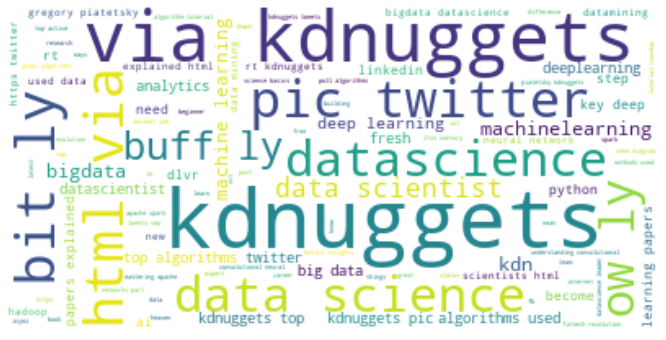

In [31]:
# Creo la nube de palabras de las 1000 primeras
joins_1 = ' '.join(grupos_de_tweets[:num_primer_grupo-1])
words_list = joins_1.lower().strip().split()
plot_word_cloud(words_list)

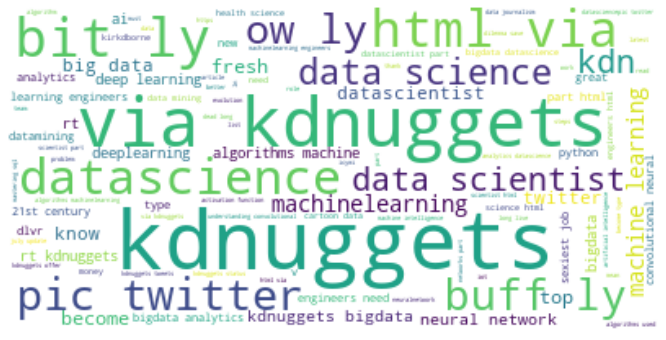

In [23]:
# Segundo set de palabras
joins_2 = ' '.join(grupos_de_tweets[num_primer_grupo:num_segundo_grupo-1])
words_list = joins_2.lower().strip().split()
plot_word_cloud(words_list)

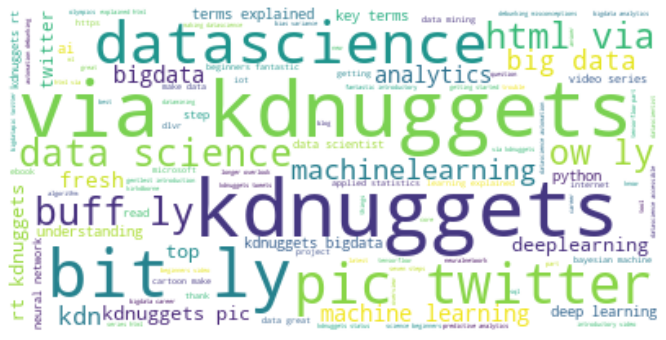

In [24]:
#Tercer set de palabras
joins_3 = ' '.join(grupos_de_tweets[num_segundo_grupo:num_tercer_grupo])
words_list = joins_3.lower().strip().split()
plot_word_cloud(words_list)

In [25]:
# Estas son las nubes de puntos a lo bruto, con palabras sin ningún significado, como son llamadas stopwords.
# Para limpiarlos un poco hay que importar las librerías de stop_words y como los tweets están en inglés (o eso presupongo)
# tengo que aplicar el filtro de inglés
sw_list = get_stop_words('en')
print(sw_list)

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

In [40]:
# Ahora que ya están cargados puedo proceder al filtrado de las palabras
print("ANTES: ",len(joins_1))
joins_1_no_sw = ' '.join([word for word in grupos_de_tweets[:num_primer_grupo-1] if word not in sw_list])

# y quito signos de acentuación
unicodedata.normalize('NFKD', joins_1_no_sw).encode('ascii', 'ignore').decode('utf-8', 'ignore')
print("DESPUES: ",len(joins_1_no_sw)) 
words_list_no_sw = joins_1_no_sw.lower().strip().split()

ANTES:  126834
DESPUES:  118316


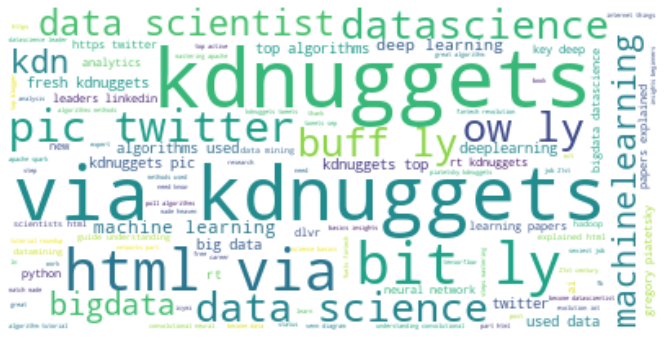

In [41]:
# Y grafico
plot_word_cloud(words_list_no_sw)

In [42]:
# Segundo Split
print("ANTES: ",len(joins_2))
joins_2_no_sw = ' '.join([word for word in grupos_de_tweets[num_primer_grupo:num_segundo_grupo-1] if word not in sw_list])

# y quito signos de acentuación
unicodedata.normalize('NFKD', joins_2_no_sw).encode('ascii', 'ignore').decode('utf-8', 'ignore')
print("DESPUES: ",len(joins_2_no_sw)) 
words_list_no_sw = joins_2_no_sw.lower().strip().split()

ANTES:  128075
DESPUES:  119301


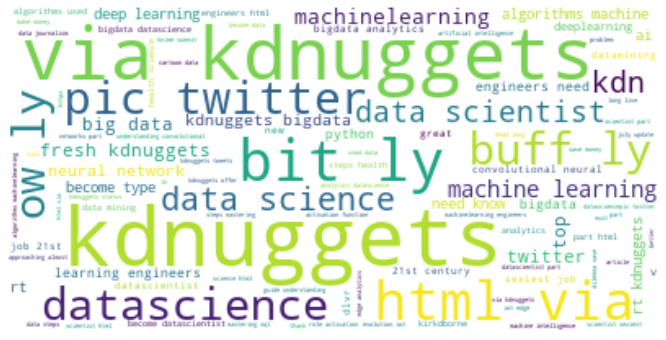

In [43]:
# También grafico
plot_word_cloud(words_list_no_sw)

ANTES:  128247
DESPUES:  119332


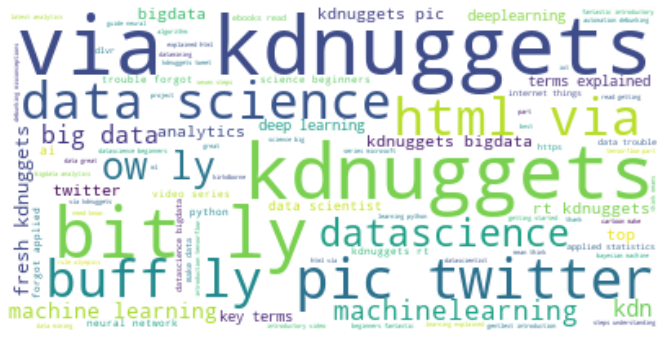

In [44]:
# Y ya el último Split
print("ANTES: ",len(joins_3))
joins_3_no_sw = ' '.join([word for word in grupos_de_tweets[num_segundo_grupo:num_tercer_grupo] if word not in sw_list])

# y quito signos de acentuación
unicodedata.normalize('NFKD', joins_3_no_sw).encode('ascii', 'ignore').decode('utf-8', 'ignore')
print("DESPUES: ",len(joins_3_no_sw)) 
words_list_no_sw = joins_3_no_sw.lower().strip().split()
plot_word_cloud(words_list_no_sw)

In [ ]:
##########################################################################

In [ ]:
# NO ME DA TIEMPO A TERMINAR ESTA PRACTICA :S